In [5]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import simps
import matplotlib.pyplot as plt
import csv
import pandas as pd
from astropy.time import Time

In [6]:
data=[]

with open("kailai_data_closed2.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    data.append(row)

In [7]:
data

[['1', '2022-09-06 14:05:29', '1'],
 ['2', '2022-09-06 14:05:34', '1'],
 ['3', '2022-09-06 14:05:38', '1'],
 ['4', '2022-09-06 14:05:48', '1'],
 ['5', '2022-09-06 14:05:53', '1'],
 ['6', '2022-09-06 14:06:02', '1'],
 ['7', '2022-09-06 14:06:06', '1'],
 ['8', '2022-09-06 14:06:06', '1'],
 ['9', '2022-09-06 14:06:23', '1'],
 ['10', '2022-09-06 14:06:24', '1'],
 ['11', '2022-09-06 14:06:25', '1'],
 ['12', '2022-09-06 14:06:27', '1'],
 ['13', '2022-09-06 14:06:28', '1'],
 ['14', '2022-09-06 14:06:30', '1'],
 ['15', '2022-09-06 14:06:47', '1'],
 ['16', '2022-09-06 14:06:49', '1'],
 ['17', '2022-09-06 14:06:51', '1'],
 ['18', '2022-09-06 14:06:52', '1'],
 ['19', '2022-09-06 14:06:54', '1'],
 ['20', '2022-09-06 14:06:59', '1'],
 ['21', '2022-09-06 14:07:02', '1'],
 ['22', '2022-09-06 14:07:03', '1'],
 ['23', '2022-09-06 14:07:11', '1'],
 ['24', '2022-09-06 14:07:16', '1'],
 ['25', '2022-09-06 14:07:20', '1'],
 ['26', '2022-09-06 14:07:21', '1'],
 ['27', '2022-09-06 14:07:24', '1'],
 ['28', '2

In [8]:
data[0],data[-1]

(['1', '2022-09-06 14:05:29', '1'], ['31684', '2022-09-08 13:41:30', '1'])

In [9]:
len(data)

31684

In [10]:
data[0][1], data[-1][1]

('2022-09-06 14:05:29', '2022-09-08 13:41:30')

In [11]:
t0=Time(data[0][1]).jd

In [12]:
data[200][1][:10]+"T"+data[200][1][11:]

'2022-09-06T14:22:56'

In [13]:
for i in range(0,len(data)):
    data[i][1]=data[i][1][:10]+"T"+data[i][1][11:]

In [14]:
print(data[40][1])

2022-09-06T14:09:04


In [15]:
Time(data[0][1]).jd

2459829.0871412037

In [16]:
for i in range(0,len(data)):
    data[i][1]=Time([data[i][1]]).jd-t0

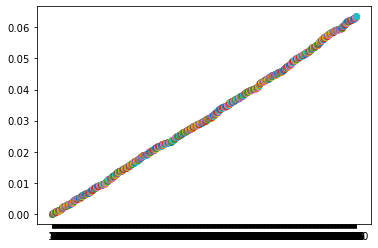

In [17]:
#for i in range(0,len(data)):
for i in range(0,1000):
    plt.scatter(data[i][0],data[i][1])

In [18]:
#print(data)

In [19]:
data_change=[]
index_array=[]
delta_t_array=[]
for i in range(0,len(data)-1):
#for i in range(0,1000):
    index_array.append(i)
    delta_t=24*60*60*(float(data[i+1][1])-float(data[i][1]))
    #print(delta_t)
    delta_t_array.append(delta_t)

In [20]:
data_change.append(index_array)
data_change.append(delta_t_array)

Text(0, 0.5, 'delta_t')

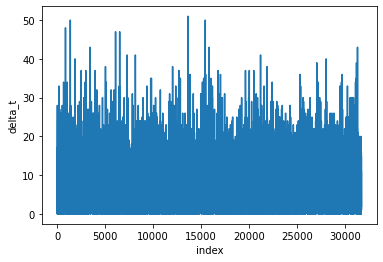

In [21]:
plt.plot(data_change[0],data_change[1])
plt.xlabel("index")
plt.ylabel("delta_t")

Text(0.5, 1.0, 'Time between Events without the Cover')

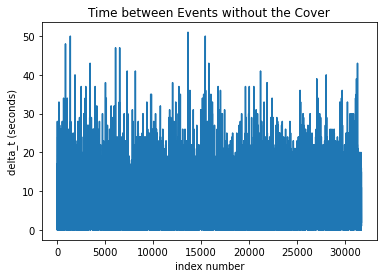

In [22]:
plt.plot(data_change[0],data_change[1])
plt.xlabel("index number")
plt.ylabel("delta_t (seconds)")
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Time between Events without the Cover")

Text(0.5, 1.0, 'Time between Events without the Cover')

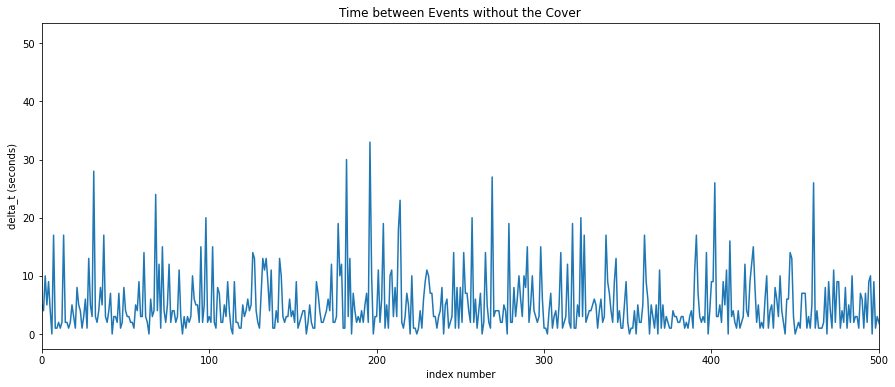

In [23]:
plt.plot(data_change[0],data_change[1])
plt.xlim(0,500)
plt.xlabel("index number")
plt.ylabel("delta_t (seconds)")
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Time between Events without the Cover")

Text(0.5, 1.0, 'Trial 2 closed: Histogram: number of events vs. time between successive arrival')

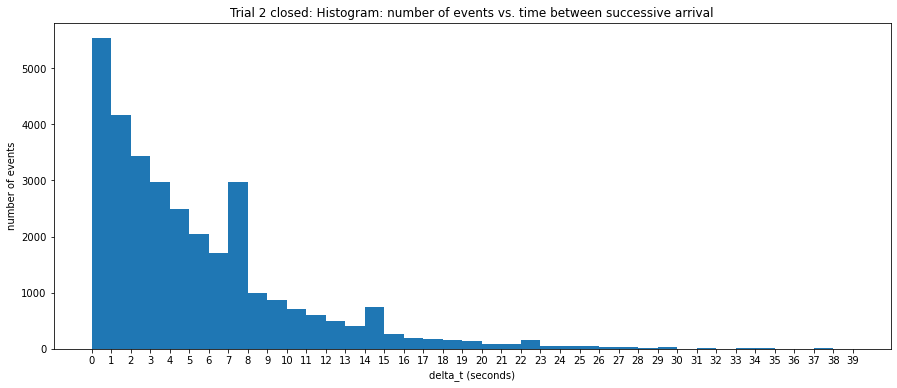

In [30]:
plt.hist(data_change[1],bins=np.arange(0,40,1))
plt.xticks(np.arange(0,40,1))
plt.xlabel("delta_t (seconds)")
plt.ylabel("number of events")
plt.title("Trial 2 closed: Histogram: number of events vs. time between successive arrival")

In [25]:
#Poisson Statistics here
t_avg=0
for i in data_change[1]:
    t_avg+=i

t_avg=t_avg/len(data_change[1])
print("t_avg",t_avg)

t_avg 5.408610295740315


In [26]:
acc_0=0
acc_1=0
acc_2=0
acc_3=0
acc_4=0
acc_5=0
acc_6=0
acc_7=0
acc_8=0
acc_9=0
acc_10=0
acc_11=0
acc_12=0
acc_13=0
for i in data_change[1]:
    if i<2:
        acc_0+=1
    elif i <4:
        acc_1+=1
    elif i<6:
        acc_2+=1
    elif i<8:
        acc_3+=1
    elif i<10:
        acc_4+=1
    elif i<12:
        acc_5+=1
    elif i<14:
        acc_6+=1
    elif i<16:
        acc_7+=1
    elif i<18:
        acc_8+=1
    elif i<20:
        acc_9+=1
    elif i<22:
        acc_10+=1
    elif i<24:
        acc_11+=1
    elif i<26:
        acc_12+=1
    else:
        acc_13+=1

print(acc_0)
print(acc_1)
print(acc_2)
print(acc_5)
print(acc_6)
print(acc_7)
print(acc_8)
print(acc_9)
print(acc_10)
print(acc_11)
print(acc_12)
print(acc_13)

9690
6395
4522
1306
902
1000
370
300
175
203
88
183


In [27]:
total=len(data_change[1])
print("total is: ", total)
exps=[0.334577,0.222635,0.148147,0.0985802,0.0655976]
for i in range(0,len(exps)):
    exps[i]=total*exps[i]

chi2=0
print("total",total)
exp0=exps[0]
obs0=acc_0
print("expected is: " + str(exp0) + "; observed is: " + str(obs0))
chi2+=(obs0-exp0)**2/exp0
print("change:", str((obs0-exp0)**2/exp0))


exp1=exps[1]
obs1=acc_1
print("expected is: " + str(exp1) + "; observed is: " + str(obs1))
chi2+=(obs1-exp1)**2/exp1
print("change:", (obs1-exp1)**2/exp1)

exp2=exps[2]
obs2=acc_2
print("expected is: " + str(exp2) + "; observed is: " + str(obs2))
chi2+=(obs2-exp2)**2/exp2
print("change:", (obs2-exp2)**2/exp2)

exp3=exps[3]
obs3=acc_3
print("expected is: " + str(exp3) + "; observed is: " + str(obs3))
chi2+=(obs3-exp3)**2/exp3
print("change:", (obs3-exp3)**2/exp3)

exp4=exps[4]
obs4=acc_4
print("expected is: " + str(exp4) + "; observed is: " + str(obs4))
chi2+=(obs4-exp4)**2/exp4
print("change:", (obs4-exp4)**2/exp4)


print("chi2_total: ", chi2)

total is:  31683
total 31683
expected is: 10600.403091; observed is: 9690
change: 78.18889347765035
expected is: 7053.744705; observed is: 6395
change: 61.519746533772114
expected is: 4693.741401; observed is: 4522
change: 6.283922844824589
expected is: 3123.3164766; observed is: 4676
change: 771.8801927053614
expected is: 2078.3287608; observed is: 1873
change: 20.285481684541214
chi2_total:  938.1582372461497


In [28]:
#use test source to test poisson
#check out reduced chi^2; 2DOF
#check out def of chi^2; check uncertainty
#uncertainty: 2 counts per second 


31683


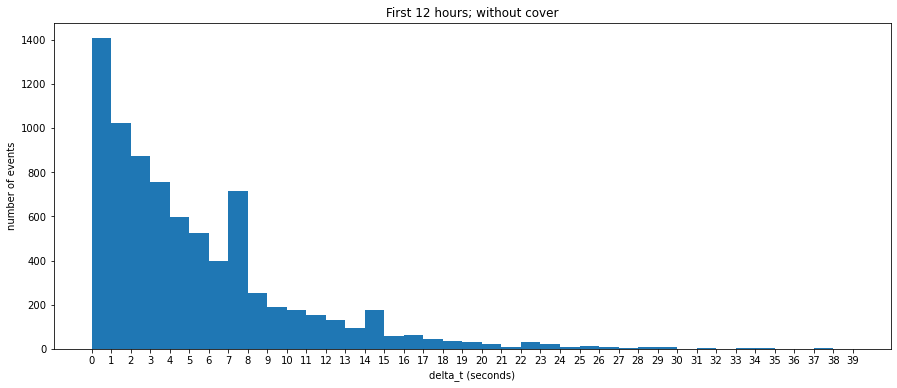

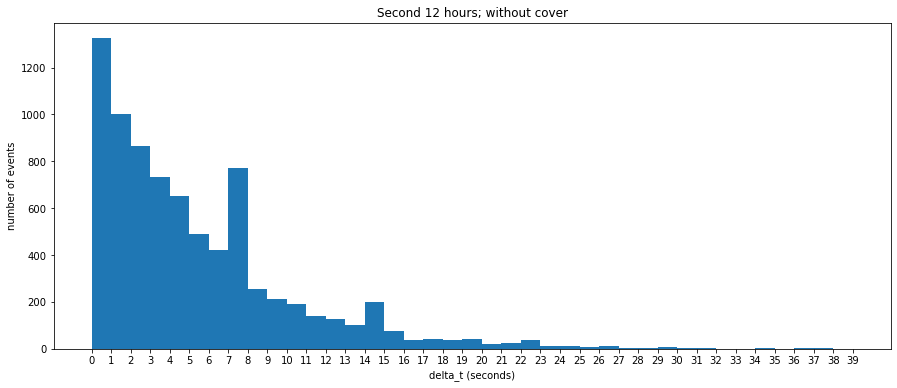

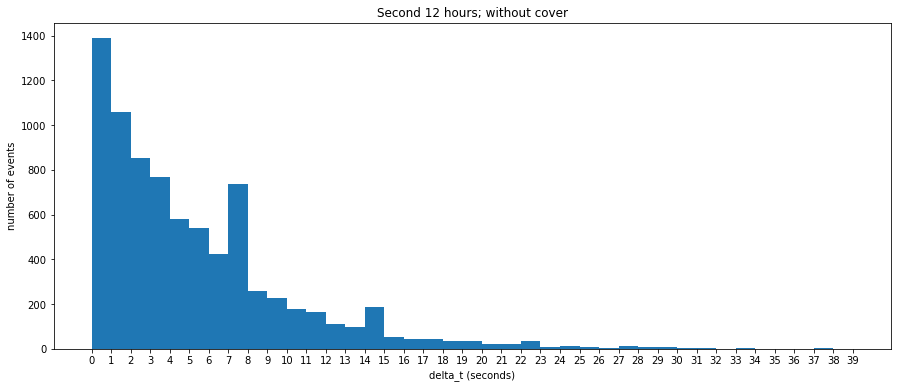

In [29]:
print(len(data_change[1]))

#first 12 hours: 7848 data points
data_12_1=data_change[1][0:7849]

plt.hist(data_12_1,bins=np.arange(0,40,1))
plt.xticks(np.arange(0,40,1))
plt.xlabel("delta_t (seconds)")
plt.ylabel("number of events")
plt.title("First 12 hours; without cover")
plt.show()

#second 12 hours:15753-7848=7905data points
data_12_2=data_change[1][7849:15754]
plt.hist(data_12_2,bins=np.arange(0,40,1))
plt.xticks(np.arange(0,40,1))
plt.xlabel("delta_t (seconds)")
plt.ylabel("number of events")
plt.title("Second 12 hours; without cover")
plt.show()

#third 12 hours: 23705-15753=7952 data points
data_12_3=data_change[1][15754:23706]
plt.hist(data_12_3,bins=np.arange(0,40,1))
plt.xticks(np.arange(0,40,1))
plt.xlabel("delta_t (seconds)")
plt.ylabel("number of events")
plt.title("Second 12 hours; without cover")
plt.show()
